In [2]:
!pip install mysql-connector-python
#My SQL Connector is necessory for generating connection between MySQl and Python Notebook.
#It has to be installed first with the above camand

In [3]:
import mysql.connector

In [4]:
# pandas lib already has a sql query read functionity which is helpful in reading the sql data in python
import pandas as pd
con=mysql.connector.connect(
host="localhost",
port=3306,
user="root",
password="R!z4gre",
database="student_marks")

df_studmarks=pd.read_sql_query("Select * from studmarks",con)
df_studmarks

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53
5,Annu,F,1988-04-05,45,87,52,89,55,89,87,52
6,Pooja,F,1987-05-04,55,64,61,58,75,58,64,61
7,Ritesh,M,1989-05-25,54,76,87,56,25,56,76,87
8,Farha,F,1990-08-12,55,63,89,75,78,75,63,89
9,Mukesh,M,1989-09-02,96,46,77,83,58,83,46,77


In [5]:
df_studmarks.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,1988-04-05,55,45,56,87,21,52,89,65
1,Suresh,M,1987-05-04,75,96,78,64,90,61,58,2
2,Ramesh,M,1989-05-25,25,54,89,76,95,87,56,74
3,Jessica,F,1990-08-12,78,96,86,63,54,89,75,45
4,Jennifer,F,1989-09-02,58,96,78,46,96,77,83,53


In [6]:
df_studmarks.isnull().sum()

Name         0
Gender       0
DOB          0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_studmarks.isnull(),annot=True)
plt.show()

<Figure size 640x480 with 2 Axes>

In [8]:
# We will check the skewness in our dataset
df_studmarks.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64

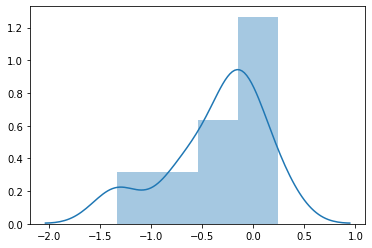

In [9]:
sns.distplot(df_studmarks.skew())
plt.show()

In [10]:
import numpy as np
civics_log= np.log(df_studmarks['Civics'])
civics_log.skew()

-2.9274204671494903

In [11]:
from scipy import stats

civics_boxcox=stats.boxcox(df_studmarks['Civics'])[0]
pd.Series(civics_boxcox).skew()

-0.8110796750372997

In [12]:
# Since column DOB(Date of Birth) has no relevance with teh EDA processing. We can drop the column DOB
df= df_studmarks.drop(['DOB','Name','Gender'],axis=1)
df

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,55,45,56,87,21,52,89,65
1,75,96,78,64,90,61,58,2
2,25,54,89,76,95,87,56,74
3,78,96,86,63,54,89,75,45
4,58,96,78,46,96,77,83,53
5,45,87,52,89,55,89,87,52
6,55,64,61,58,75,58,64,61
7,54,76,87,56,25,56,76,87
8,55,63,89,75,78,75,63,89
9,96,46,77,83,58,83,46,77


In [13]:
from scipy import stats
import numpy as np

z=np.abs(stats.zscore(df))
print(z)

[[0.24916243 1.39276651 1.45310069 1.26169862 1.70618534 1.49152635
  1.40755973 0.18716723]
 [0.83415247 1.20910499 0.20328352 0.41570417 0.98779152 0.84303663
  0.85328751 2.43317398]
 [1.87413478 0.93361271 1.03147562 0.4594625  1.18300723 1.03037811
  0.99914862 0.56150169]
 [0.99664971 1.20910499 0.80560505 0.48863473 0.41776163 1.17448693
  0.38653195 0.64468712]
 [0.08666519 1.20910499 0.20328352 1.72845418 1.22205037 0.30983398
  0.9699764  0.31194538]
 [0.79081988 0.7499512  1.75426145 1.40755973 0.37871849 1.17448693
  1.26169862 0.3535381 ]
 [0.24916243 0.42344183 1.07664973 0.85328751 0.40214437 1.05919987
  0.41570417 0.02079636]
 [0.30332817 0.18876323 0.88089524 0.99914862 1.55001277 1.2033087
  0.4594625  1.10220702]
 [0.24916243 0.47445892 1.03147562 0.38653195 0.5192738  0.16572515
  0.48863473 1.18539245]
 [1.97163312 1.34174942 0.12799333 0.9699764  0.26158906 0.74216045
  1.72845418 0.68627984]]


In [14]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [15]:
#Apllying IQR method to our student marks dataset
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Maths        16.50
Physics      37.50
Chemistry    21.75
English      22.00
Biology      32.75
Economics    27.25
History      22.00
Civics       24.00
dtype: float64


In [16]:
print((df < (Q1-1.5*IQR))|(df > (Q3+1.5*IQR)))

   Maths  Physics  Chemistry  English  Biology  Economics  History  Civics
0  False    False      False    False    False      False    False   False
1  False    False      False    False    False      False    False    True
2   True    False      False    False    False      False    False   False
3  False    False      False    False    False      False    False   False
4  False    False      False    False    False      False    False   False
5  False    False      False    False    False      False    False   False
6  False    False      False    False    False      False    False   False
7  False    False      False    False    False      False    False   False
8  False    False      False    False    False      False    False   False
9   True    False      False    False    False      False    False   False


In [17]:
df_out=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
print(df_out.shape)
print(df.shape)

(10, 8)
(10, 8)


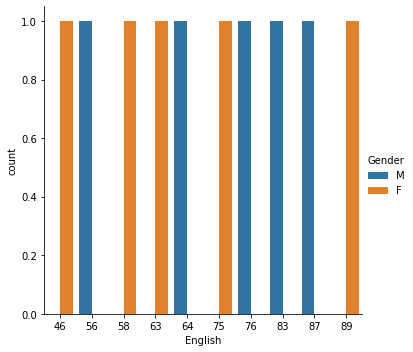

In [18]:
#We will start the Visualization on the above dataset

#Student score in English by Gender comparision

sns.catplot(x='English',hue='Gender',kind='count',data=df_studmarks)

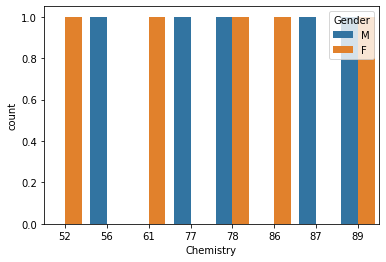

In [19]:
sns.countplot(x='Chemistry',hue='Gender',data=df_studmarks)

In [20]:
#from the above visualization it is clear that both Male and Female students has scored similar marks in chemistry.

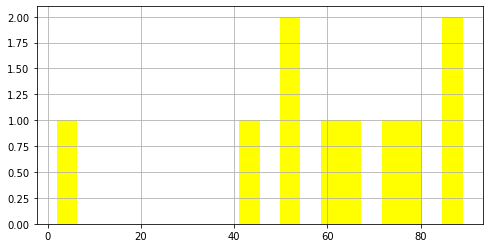

In [21]:
df_studmarks['Civics'].hist(bins=20,color='yellow', figsize=(8,4))

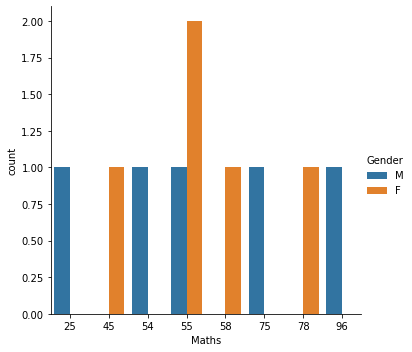

In [22]:
# Above figure indicates about the marks scored by each student in Civics subject


sns.catplot(x='Maths',hue='Gender',kind='count',data=df_studmarks)

In [23]:
# By the Gender wise analysis, male student has scored the highest and the lowest marks in maths

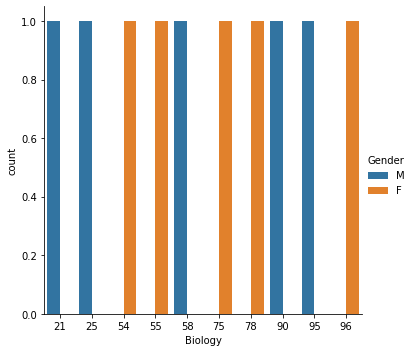

In [24]:
sns.catplot(x='Biology',hue='Gender',kind='count',data=df_studmarks)

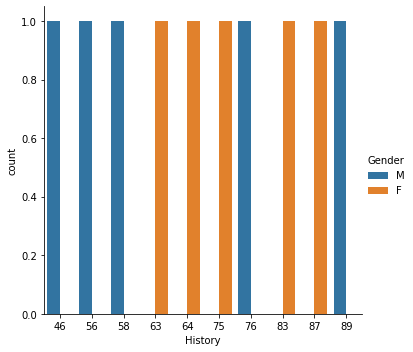

In [25]:
x=sns.catplot(x='History',hue='Gender',kind='count',data=df_studmarks)

The EDA on Student Marks shows the comparision between the marks scored by Male students and Female students in different subjects are more or less equal.
There are very few students who scored minimum marks in each subject.
The DOB of students has no relavance with the performance in subjects.

Maths and Physics are the two subjects where students have scored highest marks.

In [26]:
from sklearn.externals import joblib
joblib.dump(x,'student_marks.pkl')

C:\Users\Rizwan Khan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['student_marks.pkl']